Data plot:


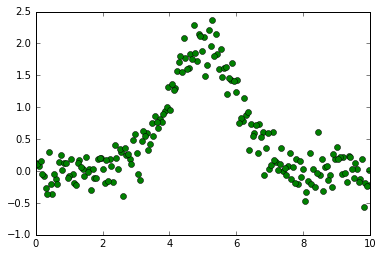

Linear regression:
The RSS training error is: 97.517621
The RSS testing error is: 100.053993
The theta coefficients are: 
theta_0: 0.501018430927
theta_1: -0.00234680272593
Polynomial regressions comparison until degree 5:
Using 90% for testing:
Using degree 5.
Training error: 42.872024
Python training error:42.872024
Testing error: 48.956528
Python testing error:48.956528

Using 75% for testing:
Using degree 5.
Training error: 41.282252
Python training error:41.282252
Testing error: 53.142865
Python testing error:53.142865

Using 50% for testing:
Using degree 5.
Training error: 37.400488
Python training error:37.400488
Testing error: 49.791341
Python testing error:49.791341

Using 90% for testing:
Using degree 4.
Training error: 45.213147
Python training error:45.213147
Testing error: 52.282529
Python testing error:52.282529

Using 75% for testing:
Using degree 4.
Training error: 43.799931
Python training error:43.799931
Testing error: 54.199039
Python testing error:54.199039

Using 5

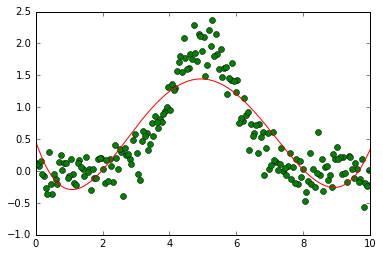

Plot degree 4: 


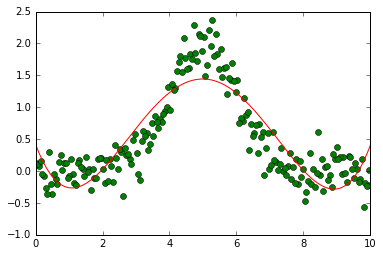

Plot degree 1: 


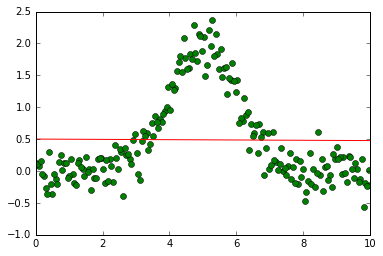

Plot degree 3: 


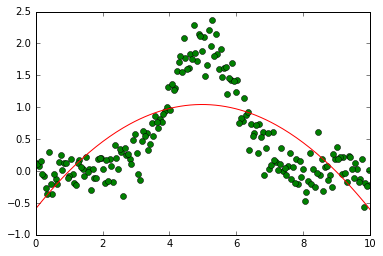

Plot degree 2: 


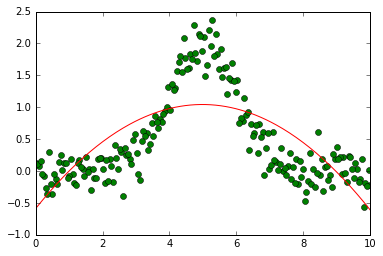

In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from pylab import *
from sklearn.cross_validation import KFold
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

#
#This function loads a file with the name given into to np arrays x and y.
#Parameters: Name of the file to load
#Returns: nparray x with feature information and nparray y with label information
def load_file(name):
    file = open(name,'r')
    x=[]
    y=[]
    for line in file:
        if not line.startswith('#'):
            l=line.split()
            x.append(float(l[0]))
            y.append(float(l[1]))
    return np.array(x), np.array(y)

#
#This function plots the data given using matplotlib
#Parameters: x - x-axis data, y - y-axis data, t - theta data.
#            If t is None, only the data points are plotted.
#            Otherwise, a line is plotted using theta as parameters.
def plot(x,y,t=None): 
    plt.plot(x,y,'go')
    
    if t is not None:
        t=t.reshape(len(t),1)
        Z=np.ones(len(x))
        X=np.sort(x)
        X_=X
        for j in range(1,len(t)):
            Z=np.column_stack((Z,X_))
            X_=X_*X
        y_hat=np.dot(Z,t)
        plt.plot(np.sort(x),y_hat,'r')
                
    plt.show()

#This function calculates y-hat given x values, theta values and a degree.
#Parameters: x - matrix or vector, t - theta vector, d - degree
#Returns: y-hat vector
def yhat(x,t,d=1):
    poly = PolynomialFeatures(degree=d)
    if len(x.shape)>1:                #If polynomial
        x=np.transpose(x)
    else:                             #If simple regression
        x=x.reshape(len(x),1)
    x=poly.fit_transform(x)
    t = t.reshape(len(t),1)
    return dot(x,t)
                
#This function regresses x and y data in a simple single feature regression.
#Does not work with multiple features. Mostly depreceated, as poly_linreg function
#can also solve single feature, but is kept for the purpose of seeing the
#simple regression formula work.
#Parameters: x - vector, y - vector
#Returns: theta vector
def simple_linreg(x,y):
    m = len(x)
    sum_x = x.sum()
    sum_x2= (x**2).sum()
    A = np.array([[m,sum_x],[sum_x,sum_x2]])
    sum_y=y.sum()
    sum_xy=np.dot(x,y)
    b = np.array([sum_y,sum_xy])
    t=solve(A,b)
    return t

#This function regresses the data to find the polynomial model given a degree
#Parameters: x - vector or matrix, y - vector, d - degree of polynomial, one by default
#Returns: theta vector
def poly_linreg(x,y,d=1):
    poly = PolynomialFeatures(degree=d)
    x=x.reshape(len(x),1)
    Z = poly.fit_transform(x)
    t = dot(dot(inv(dot(Z.T,Z)),Z.T),y)
    return t

#
#This function regresses the data using the python functions. For comparison
#Parameters: x - vector or matrix, y - vector, d - degree of polynomial, one by default
#Returns: regression object with fitted model
def py_reg(x,y,d=1):
    poly = PolynomialFeatures(degree=d)
    regr = linear_model.LinearRegression()
    x = x.reshape(len(x), 1)
    x = np.asarray(x)
    Z = poly.fit_transform(x)
    regr.fit(Z,y)
    return regr

#
#This function computes the RSE error given data and a theta vector
#Parameters: x - vector or matrix, y - vector, t - theta vector, d - degree of polynomial, one by default
#Returns: RSE 
def compute_error(x,y,t,d=1):
    total =0
    _yhat=np.transpose(yhat(x,t,d))[0]
    for i in range(0,len(x)):
        total+=(((y[i]-_yhat[i])**2)/(y[i]**2))
    total/=len(x)
    return total

#
#This function computes the RSE error using python functions
#Parameters yg - y-hat vector, y - y data vector
#Returns: RSE
def py_compute_error(yg,y):
    return np.mean(((y-yg) ** 2)/y**2)

#
#This function performs crossvalidation to find the average training and testing RSE's of
#given data using python functions, given a degree and a k-factor.
#Parameters: x - vector or matrix, y - vector, k - integer, d - degree, integer.
#Returns: training and testing RSE's
def py_cross_validation(x,y,k,d=1):
    poly = PolynomialFeatures(degree=d)
    traine=0
    teste=0
    kf = KFold(len(x),k)
    for train, test in kf:
            x_=x[train]
            y_=y[train]
            regr = py_reg(x_,y_,d)
            x_ = x_.reshape(len(x_), 1)
            x_ = poly.fit_transform(x_)
            regr.fit(x_,y_)
            traine+=py_compute_error(regr.predict(x_),y_)
            x_=x[test]
            y_=y[test]
            x_ = x_.reshape(len(x_), 1)
            x_ = poly.fit_transform(x_)
            teste+=py_compute_error(regr.predict(x_),y_)
    traine/=k
    teste/=k
    
    return traine, teste

#
#This function performs crossvalidation to find the average training and testing RSE's of
#given data , given a degree and a k-factor.
#Parameters: x - vector or matrix, y - vector, k - integer, d - degree, integer.
#Returns: training and testing RSE's
def cross_validation(x,y,k=10,d=1):
    traine=0
    teste=0
    kf = KFold(len(x),k)
    for train, test in kf:
        t = poly_linreg(x[train],y[train],d)
        traine+=compute_error(x[train],y[train],t,d)
        teste += compute_error(x[test],y[test],t,d)
    traine/=k
    teste/=k
    
    return traine, teste
                

#
#This function compares the average RSE's of the models using all the degrees up until maxd
#Parameters: x - vector or matrix, y - vector, maxd - maximum degree to compare, k - k-factor
#to be used in cross-validation, 10 by default.
#Returns: An array containing the theta vector, the testing and training RSE's, the degree,
#and the testing and training python RSE's for each degree.
def compare(x,y,maxd,k=10):
    ret=[]
    for i in range(1,maxd+1):
        t = poly_linreg(x,y,i)
        traint,testt=py_cross_validation(x,y,k,i)
        traine,teste=cross_validation(x,y,k,i)
        ret.append((t,traine,teste,i,traint,testt))
    return sorted(ret, key=lambda x: (x[1]+x[2])/2)

#
#This function runs the program according to the given parameters, and prints all necessary
#results required from the homework.
#Parameters: name - name of file being analized. maxd - maximum degree to compare models. 
#plotall - boolean that determines whether all models will be plotted or only the best one.
def run(name,maxd,plotall=False):
    arr=load_file(name)
    x,y=arr
    print("Data plot:")
    plot(x,y)
    print("Linear regression:")
    print ("The RSS training error is: %f\nThe RSS testing error is: %f"%cross_validation(arr[0],arr[1],10))
    theta_=simple_linreg(x,y)
    print("The theta coefficients are: ")
    for i in range (0,len(theta_)):
        print ("theta_"+str(i)+": "+str(theta_[i]))
    print("Polynomial regressions comparison until degree %d:"%maxd)
    cp10 = compare(x,y,maxd)
    cp25 = compare(x,y,maxd,4)
    cp50 = compare(x,y,maxd,2)
    for i in range(0,len(cp10)):
        print("Using 90% for testing:")
        print ("Using degree %d.\nTraining error: %f\nPython training error:%f\nTesting error: %f\nPython testing error:%f\n"%(cp10[i][3],cp10[i][1],cp10[i][4],cp10[i][2],cp10[i][5]))
        print("Using 75% for testing:")
        print ("Using degree %d.\nTraining error: %f\nPython training error:%f\nTesting error: %f\nPython testing error:%f\n"%(cp25[i][3],cp25[i][1],cp25[i][4],cp25[i][2],cp25[i][5]))
        print("Using 50% for testing:")
        print ("Using degree %d.\nTraining error: %f\nPython training error:%f\nTesting error: %f\nPython testing error:%f\n"%(cp50[i][3],cp50[i][1],cp50[i][4],cp50[i][2],cp50[i][5]))
    print ("The regression with degree %d has the smallest average of errors, and is therefore chosen (using 90 percent for testing). Plot: "%cp10[0][3])
    
    plot(x,y,cp10[0][0])
    #print ("Theta: %f %f"%cp[0][0])
    if plotall:
        for i in range(1,len(cp10)):
            print("Plot degree %d: "%cp10[i][3])
            plot(x,y,cp10[i][0])
  


run("svar-set3.dat.txt",5,True)
#py_reg(arr[0],arr[1],2)

